In [2]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cars = pd.read_csv('Automobile price data _Raw_.csv')

In [5]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
cars = cars.replace("?", py.nan)

In [9]:
num_like = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for x in num_like:
    cars[x] = pd.to_numeric(cars[x])

In [10]:
for x in ["normalized-losses","bore","stroke","horsepower","peak-rpm"]:
    if cars[x].isna().any():
        cars[x] = cars[x].fillna(cars[x].mean())

In [11]:
cars = cars.dropna(subset=["price"]).reset_index(drop=True)

In [12]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [14]:
cars["num-of-doors"] = cars["num-of-doors"].fillna(cars["num-of-doors"].mode(dropna=True).iloc[0])

In [15]:
cyl_map = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "ten": 10, "twelve": 12}
cars["num-of-cylinders"] = cars["num-of-cylinders"].map(cyl_map)
cars["num-of-cylinders"] = pd.to_numeric(cars["num-of-cylinders"])

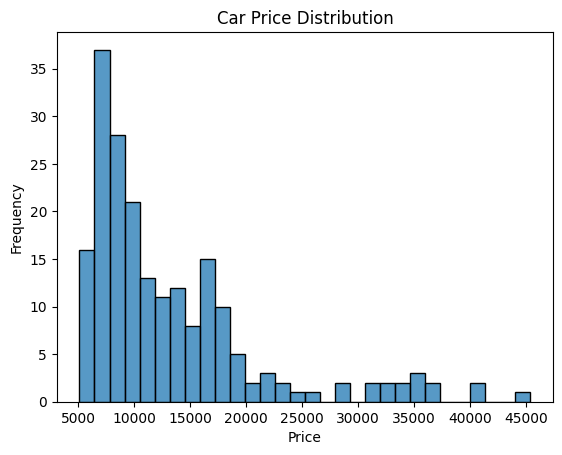

In [16]:
plt.figure()
sns.histplot(cars["price"], bins=30)
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Price')

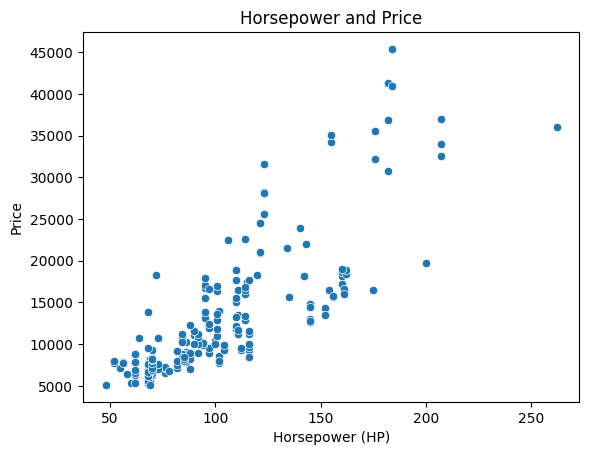

In [17]:
sns.scatterplot(x = cars["horsepower"], y = cars["price"])
plt.title("Horsepower and Price")
plt.xlabel("Horsepower (HP)")
plt.ylabel("Price")

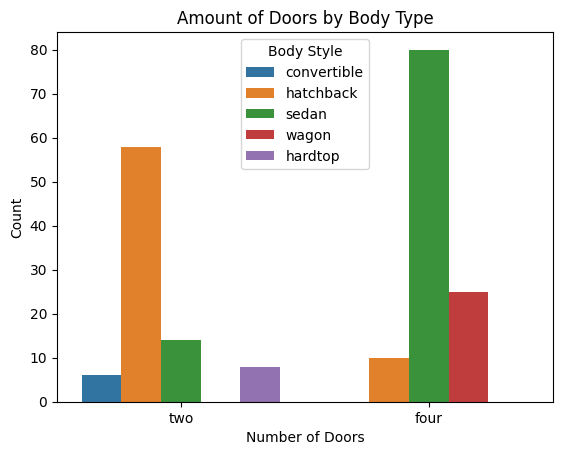

In [18]:
sns.countplot(x = cars["num-of-doors"], hue = cars["body-style"])
plt.title("Amount of Doors by Body Type")
plt.xlabel("Number of Doors")
plt.ylabel("Count")
plt.legend(title = "Body Style")

Text(0, 0.5, 'Highway MPG')

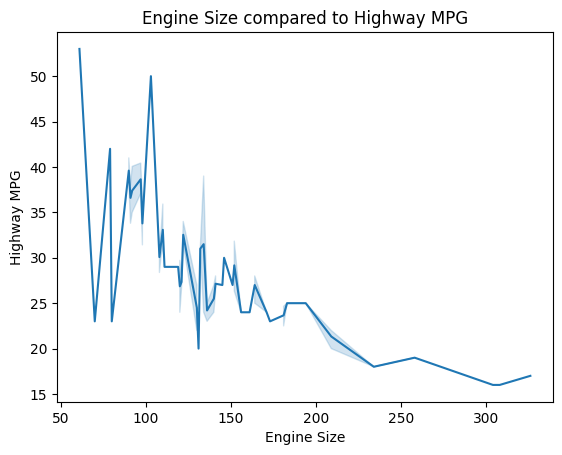

In [19]:
sns.lineplot(x = cars["engine-size"], y = cars["highway-mpg"])
plt.title("Engine Size compared to Highway MPG")
plt.xlabel("Engine Size")
plt.ylabel("Highway MPG")

Text(0, 0.5, 'Length')

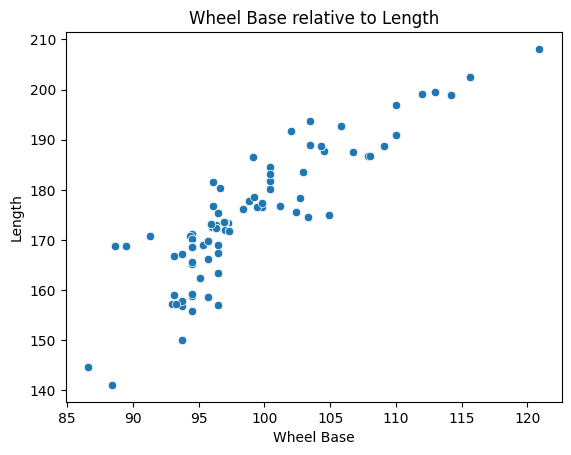

In [20]:
sns.scatterplot(x=cars["wheel-base"], y=cars["length"])
plt.title("Wheel Base relative to Length")
plt.xlabel("Wheel Base")
plt.ylabel("Length")

In [21]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [22]:
import sqlite3

In [ ]:
cars_db = "cars.db"
conn = sqlite3.connect(cars_db)

Rows loaded:  201


In [39]:
# top 10 makes by count
pd.read_sql_query("""
SELECT "make", COUNT(*) AS n
FROM "cars"
GROUP BY "make"
ORDER BY n DESC
LIMIT 10
""", conn)

,make,n
0,toyota,32
1,nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,volkswagen,12
6,subaru,12
7,volvo,11
8,peugot,11
9,dodge,9


In [40]:
# average price by body style
pd.read_sql_query("""
SELECT "body-style", ROUND(AVG(price),2) AS "avg_price", COUNT(*) AS n
FROM "cars"
GROUP BY "body-style"
ORDER BY "avg_price" DESC
""", conn)


,body-style,avg_price,n
0,hardtop,22208.50,8
1,convertible,21890.50,6
2,sedan,14459.76,94
3,wagon,12371.96,25
4,hatchback,9957.44,68


In [41]:
# average city/highway MPG by number of cylinders
pd.read_sql_query("""
SELECT CAST("num-of-cylinders" AS INT) AS cylinders,
       ROUND(AVG("city-mpg"),1)    AS avg_city_mpg,
       ROUND(AVG("highway-mpg"),1) AS avg_hwy_mpg
FROM cars
GROUP BY cylinders
ORDER BY cylinders;
""", conn)


,cylinders,avg_city_mpg,avg_hwy_mpg
0,2,16.8,23.0
1,3,47.0,53.0
2,4,27.0,32.6
3,5,19.9,24.1
4,6,18.3,23.8
5,8,15.0,17.0
6,12,13.0,17.0


In [42]:
# average price at each engine size, sorted by engine size
pd.read_sql_query("""
SELECT "engine-size", COUNT(*) AS n, ROUND(AVG(price),0) AS avg_price
FROM cars
WHERE "engine-size" IS NOT NULL AND price IS NOT NULL
GROUP BY "engine-size"
ORDER BY "engine-size";
""", conn)


,engine-size,n,avg_price
0,61,1,5151.0
1,70,3,12145.0
2,79,1,5399.0
3,80,1,15645.0
4,90,10,6384.0
5,91,5,6435.0
6,92,15,6773.0
7,97,14,7816.0
8,98,14,8171.0
9,103,1,7099.0


In [44]:
# two-way frequency: how many cars by body style × fuel type
pd.read_sql_query("""
SELECT "body-style", "fuel-type", COUNT(*) AS n
FROM cars
GROUP BY "body-style", "fuel-type"
ORDER BY n DESC;
""", conn)

,body-style,fuel-type,n
0,sedan,gas,79
1,hatchback,gas,67
2,wagon,gas,22
3,sedan,diesel,15
4,hardtop,gas,7
5,convertible,gas,6
6,wagon,diesel,3
7,hardtop,diesel,1
8,hatchback,diesel,1
